Design and develop a model using autoencoders to regenerate digits using mnist dataset.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
# Load data
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
input_size = 784
code_size = 32

input_img = Input(shape=(input_size,))

# Encoder
hidden_1 = Dense(128, activation='relu')(input_img)
hidden_2 = Dense(64, activation='relu')(hidden_1)
code = Dense(code_size, activation='relu')(hidden_2)

# Decoder
hidden_3 = Dense(64, activation='relu')(code)
hidden_4 = Dense(128, activation='relu')(hidden_3)
output_img = Dense(input_size, activation='sigmoid')(hidden_4)

# Autoencoder model
autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 0.3347 - val_loss: 0.1664
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.1580 - val_loss: 0.1360
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1340 - val_loss: 0.1230
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1228 - val_loss: 0.1162
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1162 - val_loss: 0.1115
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1120 - val_loss: 0.1079
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.1086 - val_loss: 0.1054
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.1056 - val_loss: 0.1029
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1035 - val_loss: 0.1008
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.1013 - val_loss: 0.0990
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0993 - val_loss: 0.0975
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


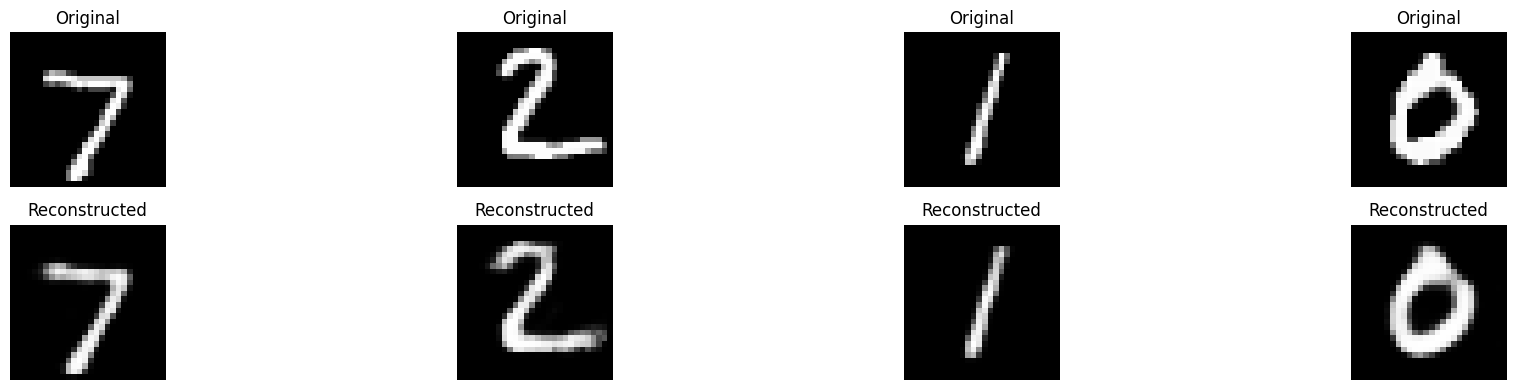

In [ ]:

# Predict reconstructed images
decoded_imgs = autoencoder.predict(x_test)

# Number of images to display
n = 4

plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()